In [ ]:
from fetch_data import fetch_data


In [3]:
df1=fetch_data('Elon Musk','Dogecoin')
df1 =df1.rename(columns={"Elon Musk's Tweet": "elon_text", "Dogecoin Price": "Dogecoin_Price"})
df1

,elon_text,Dogecoin_Price
Time,,
2020-06-18 12:00:00,[],0.002453
2020-06-18 13:00:00,[@MichaelaOkla Comes standard with Cybertruck],0.002487
2020-06-18 14:00:00,[],0.002505
2020-06-18 15:00:00,[],0.002516
2020-06-18 16:00:00,[],0.002478
...,...,...
2021-02-23 08:00:00,"[@PeterSchiff 🍆, @PPathole Super cool]",0.046890
2021-02-23 09:00:00,[],0.047160
2021-02-23 10:00:00,[],0.046030


In [47]:
df2 =fetch_data('Elon Musk','Bitcoin')

In [48]:
df1['elon_text'] = [','.join(i) if isinstance(i, list) else i for i in df1['elon_text']]

In [5]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline
from nltk.corpus import reuters, stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

In [7]:
# Create a list of stopwords
# YOUR CODE HERE
sw = set(stopwords.words('english'))

In [38]:
# Complete the tokenizer function
def tokenizer(elon_text):#text
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', elon_text) #text
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
      
    # Convert the words to lowercase
    
    output = [word.lower() for word in lem if word.lower() not in sw]
    # Remove the stop words
    return output

In [9]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
df1['tokens'] = df1['elon_text'].apply(tokenizer)

In [39]:
from collections import Counter
from nltk import ngrams

In [40]:

# Generate the Bitcoin word cloud
# YOUR CODE HERE!
corpus = df1["elon_text"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)  # what is doc
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase    
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [41]:
big_string = ' '.join(corpus)
input_text = process_text(big_string)


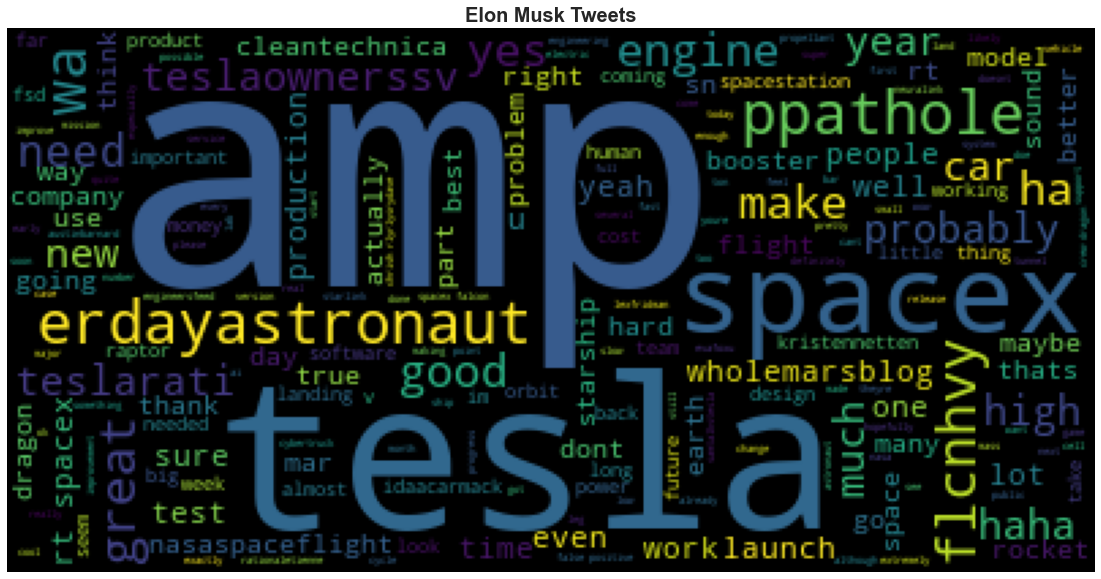

In [42]:
       
wc = WordCloud().generate(input_text)
plt.imshow(wc)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Elon Musk Tweets", fontdict=fontdict)
plt.show()

In [43]:
# Save image
wc.to_file("wordcloud.png")

In [34]:
#Historical price curve of the chosen stock/crypto- ST
import hvplot.pandas
df2.hvplot()

:Curve   [Time]   (Bitcoin Price)

In [36]:
df1.hvplot()

:Curve   [Time]   (Dogecoin_Price)

In [46]:
#Cumulative returns curve of the chosen stock/crypto-ST
#((df1['Dogecoin_Price'] + 1).cumprod() - 1).plot()